Looking into [geocat-f2py #235](https://github.com/NCAR/geocat-comp/issues/235#issuecomment-1215516532)

User provided raw code:
    
```python
    import geocat.comp
    import numpy as np
    import matplotlib.pyplot as plt

    olat = np.linspace(-90, 90, 500)
    olon = np.linspace(0, 360, 1500)
    nlat = olat.size
    nlon = olon.size

    ilat = np.linspace(-90, 90, 100)
    ilon = np.linspace(0, 360, 1000)

    data = np.random.randint(1, 500, size=(100, 1000))

    test =  out = geocat.comp.triple_to_grid(data, ilat, ilon, 
                                            olat, olon, 
                                            method=1, domain=1.0, 
                                            distmx=None, missing_value=-9990.9, 
                                            meta=False)
    plt.imshow(test)
```

[[  155.  -9990.9 -9990.9 ... -9990.9 -9990.9   444. ]]


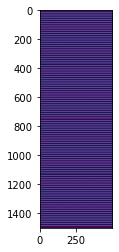

In [35]:
# original grid for data
ilat = np.linspace(-90, 90, 100)
ilon = np.linspace(0, 360, 1000)

# meshgrid for input data
lat, lon = np.meshgrid(ilat, ilon)

# flatten meshgrid to 1D arrays of length n
lat = lat.flatten()
lon = lon.flatten()

# intended new grid
olat = np.linspace(-90, 90, 500) # [M]
olon = np.linspace(0, 360, 1500) # [N]

# data, note that data needs to be [n, K]. Here K=1. 
data = np.random.randint(1, 500, size=(1, lat.shape[0]))

# place data on new rectilinear grid
test =  out = geocat.comp.triple_to_grid(data, lat, lon, 
                                        olat, olon, 
                                        method=1, domain=1.0, 
                                        distmx=None, missing_value=-9990.9, 
                                        meta=False)

# test is now [K x N x M], where K is 1, we can use np.squeeze to remove K dimension
test = np.squeeze(test)

# plotting test
plt.imshow(test)